## Setting

In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 16.7 MB 86.1 MB/s 
     |████████████████████████████████| 6.3 MB 28.0 MB/s 


In [ ]:
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster


0.12.1.post1


In [ ]:
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시
from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성

In [ ]:
import pandas as pd
import geopandas as gpd  # Import geopandas
import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리
import pandas as pd
import numpy as np
import matplotlib as plt

## Data Import

In [ ]:
df_merge3=pd.read_csv('/content/drive/MyDrive/df_merge3.csv')
df_merge3

IDX_x EXPEDITION_NAME  \
0     210191      지구사랑탐사대 8기   
1     213433      지구사랑탐사대 8기   
2     213669      지구사랑탐사대 8기   
3     213767      지구사랑탐사대 8기   
4     216557      지구사랑탐사대 8기   
...      ...             ...   
6168  162480      지구사랑탐사대 7기   
6169  162524      지구사랑탐사대 7기   
6170  162530      지구사랑탐사대 7기   
6171  162543      지구사랑탐사대 7기   
6172  162649      지구사랑탐사대 7기   

                                               CONTENTS  \
0     <audio controls="" src="/upload/earth/2020/06/...   
1     <img style="max-width:840px;width:100%;" src="...   
2     <img style="max-width:840px;width:100%;" src="...   
3     탐사일: 20. 06. 20.<br />탐사장소: 노을공원<br /><img sty...   
4     <audio controls="" src="/upload/earth/2020/06/...   
...                                                 ...   
6168  <img style="max-width:840px;width:100%;" src="...   
6169  <audio controls="" src="/upload/earth/2019/10/...   
6170  <img style="max-width:840px;width:100%;" src="...   
6171  <img style="max-width:840px;width:100%;" src="...   
6172  <audio controls="" src="/upload/earth/2019/10/...   

                           POS_ADDR   LATITUDE   LONGITUDE WEATHER  TEMP  \
0         대한민국 강원도 영월군 영월읍 영흥리 1087  37.195652  128.454258      맑음   NaN   
1        대한민국 경기도 포천시 신북면 삼정리 148-1  37.974330  127.150596   구름 조금   NaN   
2       대한민국 경기도 가평군 가평읍 이화리 산256-2  37.798361  127.524768      맑음   NaN   
3          대한민국 서울특별시 성북구 종암동 57-27  37.597499  127.030496   구름 조금   NaN   
4     대한민국 서울특별시 성내동 강동구청역1번출구.영파여고  37.532039  127.120848   조금 흐림   NaN   
...                             ...        ...         ...     ...   ...   
6168  대한민국 인천광역시 옹진군 북도면 신도리 산331-1  37.515147  126.436882      흐림   NaN   
6169     대한민국 인천광역시 옹진군 북도면 신도리 269  37.528777  126.455501      맑음   NaN   
6170   대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172  126.455515   구름 조금   NaN   
6171   대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172  126.455515   구름 조금   NaN   
6172       대한민국 경기도 광주시 도척면 도웅리 산23  37.339072  127.293360      맑음   NaN   

      WIND_SPEED  HUMIDITY  ...  털매미 소요산매미  말매미  유지매미  애매미 쓰름매미 늦털매미   기타  \
0            NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  1.0   
1            NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  1.0   
2            NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
3            NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
4            NaN       NaN  ...  0.0   0.0  1.0   0.0  0.0  0.0  0.0  0.0   
...          ...       ...  ...  ...   ...  ...   ...  ...  ...  ...  ...   
6168         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
6169         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
6170         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
6171         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
6172         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   

        year month  
0     2020.0   6.0  
1     2020.0   6.0  
2     2020.0   6.0  
3     2020.0   6.0  
4     2020.0   6.0  
...      ...   ...  
6168  2019.0  10.0  
6169  2019.0  10.0  
6170  2019.0  10.0  
6171  2019.0  10.0  
6172  2019.0  10.0  

[6173 rows x 47 columns]

In [ ]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDX_x            6173 non-null   int64  
 1   EXPEDITION_NAME  6173 non-null   object 
 2   CONTENTS         6172 non-null   object 
 3   POS_ADDR         5764 non-null   object 
 4   LATITUDE         5964 non-null   float64
 5   LONGITUDE        5964 non-null   float64
 6   WEATHER          5958 non-null   object 
 7   TEMP             213 non-null    float64
 8   WIND_SPEED       213 non-null    float64
 9   HUMIDITY         213 non-null    float64
 10  WRITER_ID        6101 non-null   object 
 11  WRITE_TIME       6101 non-null   object 
 12  IS_Q             6101 non-null   object 
 13  IDX_y            6173 non-null   float64
 14  POSTING_IDX      6173 non-null   float64
 15  RESCH_1_Q        6173 non-null   object 
 16  RESCH_2_Q        6173 non-null   object 
 17  RESCH_3_Q     

In [ ]:
df_merge3.columns

Index(['IDX_x', 'EXPEDITION_NAME', 'CONTENTS', 'POS_ADDR', 'LATITUDE',
       'LONGITUDE', 'WEATHER', 'TEMP', 'WIND_SPEED', 'HUMIDITY', 'WRITER_ID',
       'WRITE_TIME', 'IS_Q', 'IDX_y', 'POSTING_IDX', 'RESCH_1_Q', 'RESCH_2_Q',
       'RESCH_3_Q', 'RESCH_4_Q', 'RESCH_5_Q', 'RESCH_6_Q', 'RESCH_7_Q',
       'RESCH_1', 'RESCH_2', 'RESCH_3', 'RESCH_4', 'RESCH_5', 'RESCH_7',
       'downtown', 'park1', 'park2', 'forest', 'farmland', 'wetland', 'place',
       'cicada_type', '참매미', '털매미', '소요산매미', '말매미', '유지매미', '애매미', '쓰름매미',
       '늦털매미', '기타', 'year', 'month'],
      dtype='object')

In [ ]:
df_merge=pd.read_csv('/content/drive/MyDrive/df_merge.csv')
df_merge

IDX_x EXPEDITION_NAME  \
0     110429      지구사랑탐사대 6기   
1     114404      지구사랑탐사대 6기   
2     114498      지구사랑탐사대 6기   
3     114567      지구사랑탐사대 6기   
4     114904      지구사랑탐사대 6기   
...      ...             ...   
6168  326392      지구사랑탐사대 9기   
6169  326547      지구사랑탐사대 9기   
6170  328118      지구사랑탐사대 9기   
6171  328360      지구사랑탐사대 9기   
6172  343055      지구사랑탐사대 9기   

                                               CONTENTS  \
0     <img style="max-width:840px;width:100%;" src="...   
1     <img style="max-width:840px;width:100%;" src="...   
2     말매미 털맹미&nbsp; 구멍 발견~<img style="max-width:840p...   
3     <img style="max-width:840px;width:100%;" src="...   
4     <img style="max-width:840px;width:100%;" src="...   
...                                                 ...   
6168  <img style="max-width:840px;width:100%;" src="...   
6169  <img style="max-width:840px;width:100%;" src="...   
6170  <img style="max-width:840px;width:100%;" src="...   
6171  <img style="max-width:840px;width:100%;" src="...   
6172                                          "<p>안</p>   

                                               POS_ADDR   LATITUDE  \
0                          대한민국 제주특별자치도 서귀포시 성산읍 고성리 60  33.425376   
1                           대한민국 성남시 수내2동 105 파크타운대림아파트  37.373750   
2                                                   NaN  35.956884   
3                                대한민국 익산시 어양동 6 어양주공아파트  35.954396   
4     549-9 Gwangjang-dong, Gwangjin-gu, Seoul, Coré...  37.551312   
...                                                 ...        ...   
6168                          대한민국 전라북도 고창군 고창읍 석정리 724  35.431587   
6169                             대한민국 인천광역시 남구 학익2동 717  37.439510   
6170               대한민국 경기도 부천시 소사구 계수동 범안로186번나길 47-23  37.462517   
6171                           대한민국 경기도 성남시 분당구 정자동 197  37.362398   
6172                                                NaN        NaN   

       LONGITUDE WEATHER    TEMP WIND_SPEED HUMIDITY  ...  \
0     126.931341   조금 흐림     29℃       8.7㎧      62%  ...   
1     127.120813      맑음   22.6℃       2.6㎧      68%  ...   
2     126.983586   조금 흐림  17.81℃      1.15㎧      85%  ...   
3     126.983488      흐림     20℃       1.5㎧     100%  ...   
4     127.109160      맑음  30.02℃       2.6㎧      35%  ...   
...          ...     ...     ...        ...      ...  ...   
6168  126.740043      맑음  16.99℃      1.82㎧      41%  ...   
6169  126.673103      맑음   15.2℃      1.54㎧      49%  ...   
6170  126.809268   조금 흐림  15.63℃      2.06㎧      48%  ...   
6171  127.120227      맑음  10.04℃      0.51㎧      81%  ...   
6172         NaN     NaN     NaN        NaN      NaN  ...   

                               RESCH_4_Q                           RESCH_5_Q  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN                                 NaN   
...                                  ...                                 ...   
6168  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.   
6169  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.   
6170  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.   
6171  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.   
6172  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.   

                              RESCH_6_Q                        RESCH_7_Q  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   NaN                              NaN  

In [ ]:
df_merge['RESCH_1_Q']

0                            1. 촬영한 자료가 무엇인가요? (다중 선택 가능)
1                            1. 촬영한 자료가 무엇인가요? (다중 선택 가능)
2                            1. 촬영한 자료가 무엇인가요? (다중 선택 가능)
3                            1. 촬영한 자료가 무엇인가요? (다중 선택 가능)
4                            1. 촬영한 자료가 무엇인가요? (다중 선택 가능)
                              ...                        
6168    1. 자신이 살고 있는 곳과 가까운 탐사할 장소를 정하고, 한 장소에서만 탐사해 주세요.
6169    1. 자신이 살고 있는 곳과 가까운 탐사할 장소를 정하고, 한 장소에서만 탐사해 주세요.
6170    1. 자신이 살고 있는 곳과 가까운 탐사할 장소를 정하고, 한 장소에서만 탐사해 주세요.
6171    1. 자신이 살고 있는 곳과 가까운 탐사할 장소를 정하고, 한 장소에서만 탐사해 주세요.
6172    1. 자신이 살고 있는 곳과 가까운 탐사할 장소를 정하고, 한 장소에서만 탐사해 주세요.
Name: RESCH_1_Q, Length: 6173, dtype: object

In [ ]:
df_2018= df_merge.loc[df_merge['RESCH_1_Q']=='1. 촬영한 자료가 무엇인가요? (다중 선택 가능)']
df_2018

IDX_x EXPEDITION_NAME  \
0     110429      지구사랑탐사대 6기   
1     114404      지구사랑탐사대 6기   
2     114498      지구사랑탐사대 6기   
3     114567      지구사랑탐사대 6기   
4     114904      지구사랑탐사대 6기   
...      ...             ...   
3519  162480      지구사랑탐사대 7기   
3520  162524      지구사랑탐사대 7기   
3521  162530      지구사랑탐사대 7기   
3522  162543      지구사랑탐사대 7기   
3523  162649      지구사랑탐사대 7기   

                                               CONTENTS  \
0     <img style="max-width:840px;width:100%;" src="...   
1     <img style="max-width:840px;width:100%;" src="...   
2     말매미 털맹미&nbsp; 구멍 발견~<img style="max-width:840p...   
3     <img style="max-width:840px;width:100%;" src="...   
4     <img style="max-width:840px;width:100%;" src="...   
...                                                 ...   
3519  <img style="max-width:840px;width:100%;" src="...   
3520  <audio controls="" src="/upload/earth/2019/10/...   
3521  <img style="max-width:840px;width:100%;" src="...   
3522  <img style="max-width:840px;width:100%;" src="...   
3523  <audio controls="" src="/upload/earth/2019/10/...   

                                               POS_ADDR   LATITUDE  \
0                          대한민국 제주특별자치도 서귀포시 성산읍 고성리 60  33.425376   
1                           대한민국 성남시 수내2동 105 파크타운대림아파트  37.373750   
2                                                   NaN  35.956884   
3                                대한민국 익산시 어양동 6 어양주공아파트  35.954396   
4     549-9 Gwangjang-dong, Gwangjin-gu, Seoul, Coré...  37.551312   
...                                                 ...        ...   
3519                      대한민국 인천광역시 옹진군 북도면 신도리 산331-1  37.515147   
3520                         대한민국 인천광역시 옹진군 북도면 신도리 269  37.528777   
3521                       대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172   
3522                       대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172   
3523                           대한민국 경기도 광주시 도척면 도웅리 산23  37.339072   

       LONGITUDE WEATHER    TEMP WIND_SPEED HUMIDITY  ... RESCH_4_Q RESCH_5_Q  \
0     126.931341   조금 흐림     29℃       8.7㎧      62%  ...       NaN       NaN   
1     127.120813      맑음   22.6℃       2.6㎧      68%  ...       NaN       NaN   
2     126.983586   조금 흐림  17.81℃      1.15㎧      85%  ...       NaN       NaN   
3     126.983488      흐림     20℃       1.5㎧     100%  ...       NaN       NaN   
4     127.109160      맑음  30.02℃       2.6㎧      35%  ...       NaN       NaN   
...          ...     ...     ...        ...      ...  ...       ...       ...   
3519  126.436882      흐림   9.77℃       4.6㎧      61%  ...       NaN       NaN   
3520  126.455501      맑음  13.01℃         1㎧      47%  ...       NaN       NaN   
3521  126.455515   구름 조금  13.01℃       1.5㎧      50%  ...       NaN       NaN   
3522  126.455515   구름 조금  13.03℃       2.6㎧      54%  ...       NaN       NaN   
3523  127.293360      맑음  13.33℃         1㎧      44%  ...       NaN       NaN   

     RESCH_6_Q  RESCH_7_Q  RESCH_1 RESCH_2          RESCH_3 RESCH_4 RESCH_5  \
0          NaN        NaN   동영상,사진    숲,공원              NaN     NaN     NaN   
1          NaN        NaN       사진      도심  기타 (아래에 써 주세요.)     NaN     NaN   
2          NaN        NaN       사진   도심,공원  기타 (아래에 써 주세요.)     NaN     NaN   
3          NaN        NaN      동영상   도심,공원              털매미     NaN     NaN   
4          NaN        NaN      동영상      도심              NaN     NaN     NaN   
...        ...        ...      ...     ...              ...     ...     ...   
3519       NaN        NaN       사진      습지             늦털매미     NaN     NaN   
3520       NaN        NaN       사진       숲             늦털매미     NaN     NaN   
3521       NaN        NaN       사진   숲,농경지             늦털매미     NaN     NaN   
3522       NaN        NaN       사진   숲,농경지             늦털매미     NaN     NaN   
3523       NaN        NaN   동영상,사진       숲             늦털매미     NaN     NaN   

     RESCH_7  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
3519     NaN  
3520     NaN  
3521     NaN  


In [ ]:
df_2018.columns

Index(['IDX_x', 'EXPEDITION_NAME', 'CONTENTS', 'POS_ADDR', 'LATITUDE',
       'LONGITUDE', 'WEATHER', 'TEMP', 'WIND_SPEED', 'HUMIDITY', 'WRITER_ID',
       'WRITE_TIME', 'IS_Q', 'IDX_y', 'POSTING_IDX', 'RESCH_1_Q', 'RESCH_2_Q',
       'RESCH_3_Q', 'RESCH_4_Q', 'RESCH_5_Q', 'RESCH_6_Q', 'RESCH_7_Q',
       'RESCH_1', 'RESCH_2', 'RESCH_3', 'RESCH_4', 'RESCH_5', 'RESCH_7'],
      dtype='object')

In [ ]:
df_2020= df_merge.loc[df_merge['RESCH_1_Q']=='1. 자신이 살고 있는 곳과 가까운 탐사할 장소를 정하고, 한 장소에서만 탐사해 주세요.']
df_2020

IDX_x EXPEDITION_NAME  \
3524  210191      지구사랑탐사대 8기   
3525  213433      지구사랑탐사대 8기   
3526  213669      지구사랑탐사대 8기   
3527  213767      지구사랑탐사대 8기   
3528  216557      지구사랑탐사대 8기   
...      ...             ...   
6168  326392      지구사랑탐사대 9기   
6169  326547      지구사랑탐사대 9기   
6170  328118      지구사랑탐사대 9기   
6171  328360      지구사랑탐사대 9기   
6172  343055      지구사랑탐사대 9기   

                                               CONTENTS  \
3524  <audio controls="" src="/upload/earth/2020/06/...   
3525  <img style="max-width:840px;width:100%;" src="...   
3526  <img style="max-width:840px;width:100%;" src="...   
3527  탐사일: 20. 06. 20.<br />탐사장소: 노을공원<br /><img sty...   
3528  <audio controls="" src="/upload/earth/2020/06/...   
...                                                 ...   
6168  <img style="max-width:840px;width:100%;" src="...   
6169  <img style="max-width:840px;width:100%;" src="...   
6170  <img style="max-width:840px;width:100%;" src="...   
6171  <img style="max-width:840px;width:100%;" src="...   
6172                                          "<p>안</p>   

                                  POS_ADDR   LATITUDE   LONGITUDE WEATHER  \
3524             대한민국 강원도 영월군 영월읍 영흥리 1087  37.195652  128.454258      맑음   
3525            대한민국 경기도 포천시 신북면 삼정리 148-1  37.974330  127.150596   구름 조금   
3526           대한민국 경기도 가평군 가평읍 이화리 산256-2  37.798361  127.524768      맑음   
3527              대한민국 서울특별시 성북구 종암동 57-27  37.597499  127.030496   구름 조금   
3528         대한민국 서울특별시 성내동 강동구청역1번출구.영파여고  37.532039  127.120848   조금 흐림   
...                                    ...        ...         ...     ...   
6168             대한민국 전라북도 고창군 고창읍 석정리 724  35.431587  126.740043      맑음   
6169                대한민국 인천광역시 남구 학익2동 717  37.439510  126.673103      맑음   
6170  대한민국 경기도 부천시 소사구 계수동 범안로186번나길 47-23  37.462517  126.809268   조금 흐림   
6171              대한민국 경기도 성남시 분당구 정자동 197  37.362398  127.120227      맑음   
6172                                   NaN        NaN         NaN     NaN   

        TEMP WIND_SPEED HUMIDITY  ...                           RESCH_4_Q  \
3524     24℃       3.1㎧      50%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
3525  27.54℃       2.1㎧      51%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
3526  23.33℃         1㎧      69%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
3527   29.7℃         1㎧      43%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
3528  28.07℃       2.1㎧      54%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
...      ...        ...      ...  ...                                 ...   
6168  16.99℃      1.82㎧      41%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
6169   15.2℃      1.54㎧      49%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
6170  15.63℃      2.06㎧      48%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
6171  10.04℃      0.51㎧      81%  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   
6172     NaN        NaN      NaN  ...  4. 오늘 발견한 매미를 모두 선택하세요. (다중 선택 가능)   

                               RESCH_5_Q                          RESCH_6_Q  \
3524  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
3525  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
3526  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
3527  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
3528  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
...                                  ...                                ...   
6168  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
6169  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
6170  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
6171  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   
6172  5. 한 자리에 서서 매미의 울음소리를 1분간 녹음해 주세요.  6. 매미 탈피각을 발견했나요? 탈피각 사진을 찍어 주세요.   

                            RESCH_7_Q  RESCH_1           RESCH_2  \
3524  7. 탐사한 매미 사진과 주변 환경 사진을 찍어 주세요.        네

## df 2018

In [ ]:
df_2018['RESCH_3'].value_counts()

참매미                             812
말매미                             597
참매미,말매미                         369
애매미                             357
기타 (아래에 써 주세요.)                 282
                               ... 
말매미,유지매미,털매미                      1
참매미,애매미,쓰름매미,기타 (아래에 써 주세요.)      1
참매미,유지매미,기타 (아래에 써 주세요.)          1
늦털매미,기타 (아래에 써 주세요.)              1
참매미,늦털매미                          1
Name: RESCH_3, Length: 80, dtype: int64

In [ ]:
df_2018['cicada']=df_2018['RESCH_3']
df_2018

IDX_x EXPEDITION_NAME  \
0     110429      지구사랑탐사대 6기   
1     114404      지구사랑탐사대 6기   
2     114498      지구사랑탐사대 6기   
3     114567      지구사랑탐사대 6기   
4     114904      지구사랑탐사대 6기   
...      ...             ...   
3519  162480      지구사랑탐사대 7기   
3520  162524      지구사랑탐사대 7기   
3521  162530      지구사랑탐사대 7기   
3522  162543      지구사랑탐사대 7기   
3523  162649      지구사랑탐사대 7기   

                                               CONTENTS  \
0     <img style="max-width:840px;width:100%;" src="...   
1     <img style="max-width:840px;width:100%;" src="...   
2     말매미 털맹미&nbsp; 구멍 발견~<img style="max-width:840p...   
3     <img style="max-width:840px;width:100%;" src="...   
4     <img style="max-width:840px;width:100%;" src="...   
...                                                 ...   
3519  <img style="max-width:840px;width:100%;" src="...   
3520  <audio controls="" src="/upload/earth/2019/10/...   
3521  <img style="max-width:840px;width:100%;" src="...   
3522  <img style="max-width:840px;width:100%;" src="...   
3523  <audio controls="" src="/upload/earth/2019/10/...   

                                               POS_ADDR   LATITUDE  \
0                          대한민국 제주특별자치도 서귀포시 성산읍 고성리 60  33.425376   
1                           대한민국 성남시 수내2동 105 파크타운대림아파트  37.373750   
2                                                   NaN  35.956884   
3                                대한민국 익산시 어양동 6 어양주공아파트  35.954396   
4     549-9 Gwangjang-dong, Gwangjin-gu, Seoul, Coré...  37.551312   
...                                                 ...        ...   
3519                      대한민국 인천광역시 옹진군 북도면 신도리 산331-1  37.515147   
3520                         대한민국 인천광역시 옹진군 북도면 신도리 269  37.528777   
3521                       대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172   
3522                       대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172   
3523                           대한민국 경기도 광주시 도척면 도웅리 산23  37.339072   

       LONGITUDE WEATHER    TEMP WIND_SPEED HUMIDITY  ... RESCH_5_Q RESCH_6_Q  \
0     126.931341   조금 흐림     29℃       8.7㎧      62%  ...       NaN       NaN   
1     127.120813      맑음   22.6℃       2.6㎧      68%  ...       NaN       NaN   
2     126.983586   조금 흐림  17.81℃      1.15㎧      85%  ...       NaN       NaN   
3     126.983488      흐림     20℃       1.5㎧     100%  ...       NaN       NaN   
4     127.109160      맑음  30.02℃       2.6㎧      35%  ...       NaN       NaN   
...          ...     ...     ...        ...      ...  ...       ...       ...   
3519  126.436882      흐림   9.77℃       4.6㎧      61%  ...       NaN       NaN   
3520  126.455501      맑음  13.01℃         1㎧      47%  ...       NaN       NaN   
3521  126.455515   구름 조금  13.01℃       1.5㎧      50%  ...       NaN       NaN   
3522  126.455515   구름 조금  13.03℃       2.6㎧      54%  ...       NaN       NaN   
3523  127.293360      맑음  13.33℃         1㎧      44%  ...       NaN       NaN   

     RESCH_7_Q  RESCH_1  RESCH_2          RESCH_3 RESCH_4 RESCH_5 RESCH_7  \
0          NaN   동영상,사진     숲,공원              NaN     NaN     NaN     NaN   
1          NaN       사진       도심  기타 (아래에 써 주세요.)     NaN     NaN     NaN   
2          NaN       사진    도심,공원  기타 (아래에 써 주세요.)     NaN     NaN     NaN   
3          NaN      동영상    도심,공원              털매미     NaN     NaN     NaN   
4          NaN      동영상       도심              NaN     NaN     NaN     NaN   
...        ...      ...      ...              ...     ...     ...     ...   
3519       NaN       사진       습지             늦털매미     NaN     NaN     NaN   
3520       NaN       사진        숲             늦털매미     NaN     NaN     NaN   
3521       NaN       사진    숲,농경지             늦털매미     NaN     NaN     NaN   
3522       NaN       사진    숲,농경지             늦털매미     NaN     NaN     NaN   
3523       NaN   동영상,사진        숲             늦털매미     NaN     NaN     NaN   

               cicada  
0                 NaN  
1     기타 (아래에 써 주세요.)  
2     기타 (아래에 써 주세요.)  
3                 털매미  
4                 NaN  
...               ...  
3519  

In [ ]:
df_2018.dropna(subset=['cicada'], inplace=True)

In [ ]:
df_2018['cicada'].value_counts()

참매미                             812
말매미                             597
참매미,말매미                         369
애매미                             357
기타 (아래에 써 주세요.)                 282
                               ... 
말매미,유지매미,털매미                      1
참매미,애매미,쓰름매미,기타 (아래에 써 주세요.)      1
참매미,유지매미,기타 (아래에 써 주세요.)          1
늦털매미,기타 (아래에 써 주세요.)              1
참매미,늦털매미                          1
Name: cicada, Length: 80, dtype: int64

In [ ]:
new_data=df_2018['cicada'].value_counts()


new_data2=new_data.to_frame()
new_data2

cicada
참매미                              812
말매미                              597
참매미,말매미                          369
애매미                              357
기타 (아래에 써 주세요.)                  282
...                              ...
말매미,유지매미,털매미                       1
참매미,애매미,쓰름매미,기타 (아래에 써 주세요.)       1
참매미,유지매미,기타 (아래에 써 주세요.)           1
늦털매미,기타 (아래에 써 주세요.)               1
참매미,늦털매미                           1

[80 rows x 1 columns]

In [ ]:
df_2018['cicada'].str.contains('늦털매미')

1       False
2       False
3       False
5       False
6       False
        ...  
3519     True
3520     True
3521     True
3522     True
3523     True
Name: cicada, Length: 3387, dtype: bool

In [ ]:
df_2018.loc[ (df_2018['cicada'].str.contains('참매미', na=False)), '참매미'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('참매미', na=False)), '참매미'] =0


df_2018.loc[ (df_2018['cicada'].str.contains('털매미', na=False)), '털매미'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('털매미', na=False)), '털매미'] =0


df_2018.loc[ (df_2018['cicada'].str.contains('소요산매미', na=False)), '소요산매미'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('소요산매미', na=False)), '소요산매미'] =0

df_2018.loc[ (df_2018['cicada'].str.contains('유지매미', na=False)), '유지매미'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('유지매미', na=False)), '유지매미'] =0

df_2018.loc[ (df_2018['cicada'].str.contains('애매미', na=False)), '애매미'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('애매미', na=False)), '애매미'] =0

df_2018.loc[ (df_2018['cicada'].str.contains('말매미', na=False)), '말매미'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('말매미', na=False)), '말매미'] =0

df_2018.loc[ (df_2018['cicada'].str.contains('쓰름매미', na=False)), '쓰름매미'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('쓰름매미', na=False)), '쓰름매미'] =0

df_2018.loc[ (df_2018['cicada'].str.contains('기타', na=False)), '기타'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('기타', na=False)), '기타'] =0

df_2018.loc[ (df_2018['cicada'].str.contains('늦털매미', na=False)), '늦털매미'] =1
df_2018.loc[~ (df_2018['cicada'].str.contains('늦털매미', na=False)), '늦털매미'] =0


df_2018

IDX_x EXPEDITION_NAME  \
1     114404      지구사랑탐사대 6기   
2     114498      지구사랑탐사대 6기   
3     114567      지구사랑탐사대 6기   
5     114906      지구사랑탐사대 6기   
6     114911      지구사랑탐사대 6기   
...      ...             ...   
3519  162480      지구사랑탐사대 7기   
3520  162524      지구사랑탐사대 7기   
3521  162530      지구사랑탐사대 7기   
3522  162543      지구사랑탐사대 7기   
3523  162649      지구사랑탐사대 7기   

                                               CONTENTS  \
1     <img style="max-width:840px;width:100%;" src="...   
2     말매미 털맹미&nbsp; 구멍 발견~<img style="max-width:840p...   
3     <img style="max-width:840px;width:100%;" src="...   
5     영상에는 소요산매미 3마리 소리가 들리고 털매미 소리는 멀리서 들렸는데 묻혔네요.<...   
6     소요산매미 다음으로 털매미가 나오는 것 같습니다.<img style="max-wid...   
...                                                 ...   
3519  <img style="max-width:840px;width:100%;" src="...   
3520  <audio controls="" src="/upload/earth/2019/10/...   
3521  <img style="max-width:840px;width:100%;" src="...   
3522  <img style="max-width:840px;width:100%;" src="...   
3523  <audio controls="" src="/upload/earth/2019/10/...   

                           POS_ADDR   LATITUDE   LONGITUDE WEATHER    TEMP  \
1       대한민국 성남시 수내2동 105 파크타운대림아파트  37.373750  127.120813      맑음   22.6℃   
2                               NaN  35.956884  126.983586   조금 흐림  17.81℃   
3            대한민국 익산시 어양동 6 어양주공아파트  35.954396  126.983488      흐림     20℃   
5        대한민국 경기도 여주군 금사면 금사리 555-3  37.410415  127.509309      맑음  30.98℃   
6         대한민국 경기도 여주군 금사면 금품1로 695  37.405828  127.501576      맑음  31.71℃   
...                             ...        ...         ...     ...     ...   
3519  대한민국 인천광역시 옹진군 북도면 신도리 산331-1  37.515147  126.436882      흐림   9.77℃   
3520     대한민국 인천광역시 옹진군 북도면 신도리 269  37.528777  126.455501      맑음  13.01℃   
3521   대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172  126.455515   구름 조금  13.01℃   
3522   대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172  126.455515   구름 조금  13.03℃   
3523       대한민국 경기도 광주시 도척면 도웅리 산23  37.339072  127.293360      맑음  13.33℃   

     WIND_SPEED HUMIDITY  ...           cicada  참매미  털매미  소요산매미  유지매미  애매미  \
1          2.6㎧      68%  ...  기타 (아래에 써 주세요.)  0.0  0.0    0.0   0.0  0.0   
2         1.15㎧      85%  ...  기타 (아래에 써 주세요.)  0.0  0.0    0.0   0.0  0.0   
3          1.5㎧     100%  ...              털매미  0.0  1.0    0.0   0.0  0.0   
5          3.6㎧      35%  ...        털매미,소요산매미  0.0  1.0    1.0   0.0  0.0   
6          3.1㎧      32%  ...              털매미  0.0  1.0    0.0   0.0  0.0   
...         ...      ...  ...              ...  ...  ...    ...   ...  ...   
3519       4.6㎧      61%  ...             늦털매미  0.0  1.0    0.0   0.0  0.0   
3520         1㎧      47%  ...             늦털매미  0.0  1.0    0.0   0.0  0.0   
3521       1.5㎧      50%  ...             늦털매미  0.0  1.0    0.0   0.0  0.0   
3522       2.6㎧      54%  ...             늦털매미  0.0  1.0    0.0   0.0  0.0   
3523         1㎧      44%  ...             늦털매미  0.0  1.0    0.0   0.0  0.0   

      말매미 쓰름매미   기타 늦털매미  
1     0.0  0.0  1.0  0.0  
2     0.0  0.0  1.0  0.0  
3     0.0  0.0  0.0  0.0  
5     0.0  0.0  0.0  0.0  
6     0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  
3519  0.0  0.0  0.0  1.0  
3520  0.0  0.0  0.0  1.0  
3521  0.0  0.0  0.0  1.0  
3522  0.0  0.0  0.0  1.0  
3523  0.0  0.0  0.0  1.0  

[3387 rows x 38 columns]

In [ ]:


display(df_2018['참매미'].value_counts())
display(df_2018['털매미'].value_counts())
display(df_2018['소요산매미'].value_counts())
display(df_2018['말매미'].value_counts())
display(df_2018['유지매미'].value_counts())

display(df_2018['애매미'].value_counts())
display(df_2018['쓰름매미'].value_counts())
display(df_2018['늦털매미'].value_counts())
display(df_2018['기타'].value_counts())


0.0    1799
1.0    1588
Name: 참매미, dtype: int64

0.0    3053
1.0     334
Name: 털매미, dtype: int64

0.0    3364
1.0      23
Name: 소요산매미, dtype: int64

0.0    2073
1.0    1314
Name: 말매미, dtype: int64

0.0    3189
1.0     198
Name: 유지매미, dtype: int64

0.0    2665
1.0     722
Name: 애매미, dtype: int64

0.0    3122
1.0     265
Name: 쓰름매미, dtype: int64

0.0    3273
1.0     114
Name: 늦털매미, dtype: int64

0.0    3055
1.0     332
Name: 기타, dtype: int64

In [ ]:
cicada_count_2018 = pd.DataFrame({'cicada':['참매미', '털매미', '소요산매미', '말매미','유지매미','애매미','쓰름매미','늦털매미'],
                             'num':[1588, 194, 23, 1314, 198, 722, 265, 114]})

cicada_count_2018

cicada   num
0    참매미  1588
1    털매미   194
2  소요산매미    23
3    말매미  1314
4   유지매미   198
5    애매미   722
6   쓰름매미   265
7   늦털매미   114

## df 2020



In [ ]:
df_2020['cicada']=df_2020['RESCH_4']

In [ ]:
df_2020.loc[ (df_2020['cicada'].str.contains('참매미', na=False)), '참매미'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('참매미', na=False)), '참매미'] =0

df_2020.loc[ (df_2020['cicada'].str.contains('털매미', na=False)), '털매미'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('털매미', na=False)), '털매미'] =0


df_2020.loc[ (df_2020['cicada'].str.contains('소요산매미', na=False)), '소요산매미'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('소요산매미', na=False)), '소요산매미'] =0

df_2020.loc[ (df_2020['cicada'].str.contains('유지매미', na=False)), '유지매미'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('유지매미', na=False)), '유지매미'] =0

df_2020.loc[ (df_2020['cicada'].str.contains('애매미', na=False)), '애매미'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('애매미', na=False)), '애매미'] =0

df_2020.loc[ (df_2020['cicada'].str.contains('말매미', na=False)), '말매미'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('말매미', na=False)), '말매미'] =0

df_2020.loc[ (df_2020['cicada'].str.contains('쓰름매미', na=False)), '쓰름매미'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('쓰름매미', na=False)), '쓰름매미'] =0

df_2020.loc[ (df_2020['cicada'].str.contains('늦털매미', na=False)), '늦털매미'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('늦털매미', na=False)), '늦털매미'] =0


df_2020.loc[ (df_2020['cicada'].str.contains('기타', na=False)), '기타'] =1
df_2020.loc[~ (df_2020['cicada'].str.contains('기타', na=False)), '기타'] =0



df_2020

IDX_x EXPEDITION_NAME  \
3524  210191      지구사랑탐사대 8기   
3525  213433      지구사랑탐사대 8기   
3526  213669      지구사랑탐사대 8기   
3527  213767      지구사랑탐사대 8기   
3528  216557      지구사랑탐사대 8기   
...      ...             ...   
6168  326392      지구사랑탐사대 9기   
6169  326547      지구사랑탐사대 9기   
6170  328118      지구사랑탐사대 9기   
6171  328360      지구사랑탐사대 9기   
6172  343055      지구사랑탐사대 9기   

                                               CONTENTS  \
3524  <audio controls="" src="/upload/earth/2020/06/...   
3525  <img style="max-width:840px;width:100%;" src="...   
3526  <img style="max-width:840px;width:100%;" src="...   
3527  탐사일: 20. 06. 20.<br />탐사장소: 노을공원<br /><img sty...   
3528  <audio controls="" src="/upload/earth/2020/06/...   
...                                                 ...   
6168  <img style="max-width:840px;width:100%;" src="...   
6169  <img style="max-width:840px;width:100%;" src="...   
6170  <img style="max-width:840px;width:100%;" src="...   
6171  <img style="max-width:840px;width:100%;" src="...   
6172                                          "<p>안</p>   

                                  POS_ADDR   LATITUDE   LONGITUDE WEATHER  \
3524             대한민국 강원도 영월군 영월읍 영흥리 1087  37.195652  128.454258      맑음   
3525            대한민국 경기도 포천시 신북면 삼정리 148-1  37.974330  127.150596   구름 조금   
3526           대한민국 경기도 가평군 가평읍 이화리 산256-2  37.798361  127.524768      맑음   
3527              대한민국 서울특별시 성북구 종암동 57-27  37.597499  127.030496   구름 조금   
3528         대한민국 서울특별시 성내동 강동구청역1번출구.영파여고  37.532039  127.120848   조금 흐림   
...                                    ...        ...         ...     ...   
6168             대한민국 전라북도 고창군 고창읍 석정리 724  35.431587  126.740043      맑음   
6169                대한민국 인천광역시 남구 학익2동 717  37.439510  126.673103      맑음   
6170  대한민국 경기도 부천시 소사구 계수동 범안로186번나길 47-23  37.462517  126.809268   조금 흐림   
6171              대한민국 경기도 성남시 분당구 정자동 197  37.362398  127.120227      맑음   
6172                                   NaN        NaN         NaN     NaN   

        TEMP WIND_SPEED HUMIDITY  ...           cicada  참매미 소요산매미  유지매미  애매미  \
3524     24℃       3.1㎧      50%  ...  기타 (아래에 써 주세요.)  0.0   0.0   0.0  0.0   
3525  27.54℃       2.1㎧      51%  ...  기타 (아래에 써 주세요.)  0.0   0.0   0.0  0.0   
3526  23.33℃         1㎧      69%  ...              털매미  0.0   0.0   0.0  0.0   
3527   29.7℃         1㎧      43%  ...              털매미  0.0   0.0   0.0  0.0   
3528  28.07℃       2.1㎧      54%  ...              말매미  0.0   0.0   0.0  0.0   
...      ...        ...      ...  ...              ...  ...   ...   ...  ...   
6168  16.99℃      1.82㎧      41%  ...             늦털매미  0.0   0.0   0.0  0.0   
6169   15.2℃      1.54㎧      49%  ...  기타 (아래에 써 주세요.)  0.0   0.0   0.0  0.0   
6170  15.63℃      2.06㎧      48%  ...  기타 (아래에 써 주세요.)  0.0   0.0   0.0  0.0   
6171  10.04℃      0.51㎧      81%  ...  기타 (아래에 써 주세요.)  0.0   0.0   0.0  0.0   
6172     NaN        NaN      NaN  ...        애매미,소요산매미  0.0   1.0   0.0  1.0   

      말매미 쓰름매미   기타  털매미 늦털매미  
3524  0.0  0.0  1.0  0.0  0.0  
3525  0.0  0.0  1.0  0.0  0.0  
3526  0.0  0.0  0.0  1.0  0.0  
3527  0.0  0.0  0.0  1.0  0.0  
3528  1.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  
6168  0.0  0.0  0.0  1.0  1.0  
6169  0.0  0.0  1.0  0.0  0.0  
6170  0.0  0.0  1.0  0.0  0.0  
6171  0.0  0.0  1.0  0.0  0.0  
6172  0.0  0.0  0.0  0.0  0.0  

[2649 rows x 38 columns]

In [ ]:
df_2020.dropna(subset=['cicada'], inplace=True)

In [ ]:
df_2020

IDX_x EXPEDITION_NAME  \
3524  210191      지구사랑탐사대 8기   
3525  213433      지구사랑탐사대 8기   
3526  213669      지구사랑탐사대 8기   
3527  213767      지구사랑탐사대 8기   
3528  216557      지구사랑탐사대 8기   
...      ...             ...   
6168  326392      지구사랑탐사대 9기   
6169  326547      지구사랑탐사대 9기   
6170  328118      지구사랑탐사대 9기   
6171  328360      지구사랑탐사대 9기   
6172  343055      지구사랑탐사대 9기   

                                               CONTENTS  \
3524  <audio controls="" src="/upload/earth/2020/06/...   
3525  <img style="max-width:840px;width:100%;" src="...   
3526  <img style="max-width:840px;width:100%;" src="...   
3527  탐사일: 20. 06. 20.<br />탐사장소: 노을공원<br /><img sty...   
3528  <audio controls="" src="/upload/earth/2020/06/...   
...                                                 ...   
6168  <img style="max-width:840px;width:100%;" src="...   
6169  <img style="max-width:840px;width:100%;" src="...   
6170  <img style="max-width:840px;width:100%;" src="...   
6171  <img style="max-width:840px;width:100%;" src="...   
6172                                          "<p>안</p>   

                                  POS_ADDR   LATITUDE   LONGITUDE WEATHER  \
3524             대한민국 강원도 영월군 영월읍 영흥리 1087  37.195652  128.454258      맑음   
3525            대한민국 경기도 포천시 신북면 삼정리 148-1  37.974330  127.150596   구름 조금   
3526           대한민국 경기도 가평군 가평읍 이화리 산256-2  37.798361  127.524768      맑음   
3527              대한민국 서울특별시 성북구 종암동 57-27  37.597499  127.030496   구름 조금   
3528         대한민국 서울특별시 성내동 강동구청역1번출구.영파여고  37.532039  127.120848   조금 흐림   
...                                    ...        ...         ...     ...   
6168             대한민국 전라북도 고창군 고창읍 석정리 724  35.431587  126.740043      맑음   
6169                대한민국 인천광역시 남구 학익2동 717  37.439510  126.673103      맑음   
6170  대한민국 경기도 부천시 소사구 계수동 범안로186번나길 47-23  37.462517  126.809268   조금 흐림   
6171              대한민국 경기도 성남시 분당구 정자동 197  37.362398  127.120227      맑음   
6172                                   NaN        NaN         NaN     NaN   

        TEMP WIND_SPEED HUMIDITY  ... RESCH_7           cicada  참매미  소요산매미  \
3524     24℃       3.1㎧      50%  ...       네  기타 (아래에 써 주세요.)  0.0    0.0   
3525  27.54℃       2.1㎧      51%  ...       네  기타 (아래에 써 주세요.)  0.0    0.0   
3526  23.33℃         1㎧      69%  ...       네              털매미  0.0    0.0   
3527   29.7℃         1㎧      43%  ...       네              털매미  0.0    0.0   
3528  28.07℃       2.1㎧      54%  ...       네              말매미  0.0    0.0   
...      ...        ...      ...  ...     ...              ...  ...    ...   
6168  16.99℃      1.82㎧      41%  ...       네             늦털매미  0.0    0.0   
6169   15.2℃      1.54㎧      49%  ...       네  기타 (아래에 써 주세요.)  0.0    0.0   
6170  15.63℃      2.06㎧      48%  ...       네  기타 (아래에 써 주세요.)  0.0    0.0   
6171  10.04℃      0.51㎧      81%  ...       네  기타 (아래에 써 주세요.)  0.0    0.0   
6172     NaN        NaN      NaN  ...       네        애매미,소요산매미  0.0    1.0   

      유지매미  애매미  말매미 쓰름매미   기타  털매미  
3524   0.0  0.0  0.0  0.0  1.0  0.0  
3525   0.0  0.0  0.0  0.0  1.0  0.0  
3526   0.0  0.0  0.0  0.0  0.0  1.0  
3527   0.0  0.0  0.0  0.0  0.0  1.0  
3528   0.0  0.0  1.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  
6168   0.0  0.0  0.0  0.0  0.0  1.0  
6169   0.0  0.0  0.0  0.0  1.0  0.0  
6170   0.0  0.0  0.0  0.0  1.0  0.0  
6171   0.0  0.0  0.0  0.0  1.0  0.0  
6172   0.0  1.0  0.0  0.0  0.0  0.0  

[2649 rows x 37 columns]

In [ ]:
df_2020['cicada'].value_counts()
new_data3=df_2020['cicada'].value_counts()


new_data4=new_data3.to_frame()
new_data4


cicada
참매미                  856
말매미                  551
기타 (아래에 써 주세요.)      351
참매미,말매미              232
애매미                  121
...                  ...
말매미,애매미,털매미,늦털매미       1
쓰름매미,소요산매미             1
말매미,애매미,털매미            1
참매미,쓰름매미,유지매미          1
애매미,쓰름매미,털매미           1

[72 rows x 1 columns]

In [ ]:
display(df_2020['참매미'].value_counts())
display(df_2020['털매미'].value_counts())
display(df_2020['소요산매미'].value_counts())
display(df_2020['말매미'].value_counts())
display(df_2020['유지매미'].value_counts())

display(df_2020['애매미'].value_counts())
display(df_2020['쓰름매미'].value_counts())
display(df_2020['늦털매미'].value_counts())
display(df_2020['기타'].value_counts())


0.0    1366
1.0    1283
Name: 참매미, dtype: int64

0.0    2522
1.0     127
Name: 털매미, dtype: int64

0.0    2630
1.0      19
Name: 소요산매미, dtype: int64

0.0    1664
1.0     985
Name: 말매미, dtype: int64

0.0    2512
1.0     137
Name: 유지매미, dtype: int64

0.0    2307
1.0     342
Name: 애매미, dtype: int64

0.0    2517
1.0     132
Name: 쓰름매미, dtype: int64

0.0    2615
1.0      34
Name: 늦털매미, dtype: int64

0.0    2259
1.0     390
Name: 기타, dtype: int64

In [ ]:
cicada_count_2020 = pd.DataFrame({'cicada':['참매미', '털매미', '소요산매미', '말매미','유지매미','애매미','쓰름매미','늦털매미'],
                             'num':[1283, 95, 19, 985, 137, 342, 132, 34]})

cicada_count_2020



cicada   num
0    참매미  1283
1    털매미    95
2  소요산매미    19
3    말매미   985
4   유지매미   137
5    애매미   342
6   쓰름매미   132
7   늦털매미    34

In [ ]:
cicada_total_count=pd.DataFrame({'Year': ['2018-2019', '2020-2021'],
                                 'num': [4418,3027]})
cicada_total_count

# 전체 관찰: 3387/2649

#1.3 1.14

#전체 관찰 한 사람 대비/ 매미수

Year   num
0  2018-2019  4418
1  2020-2021  3027

In [ ]:
a=4418/3387
b=3027/2649

cicada_percent=pd.DataFrame({'Year': ['2018-2019', '2020-2021'],
                                 'percent': [a,b]})

cicada_percent

Year   percent
0  2018-2019  1.304399
1  2020-2021  1.142695

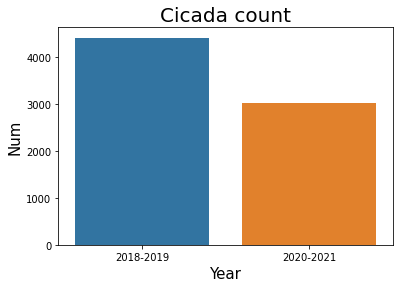

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=cicada_total_count, x='Year', y='num')
plt.xlabel("Year", size=15)
plt.ylabel("Num", size=15)
plt.title("Cicada count", size=20)
plt.show()

## 늦털매미, 소요산매미 제외

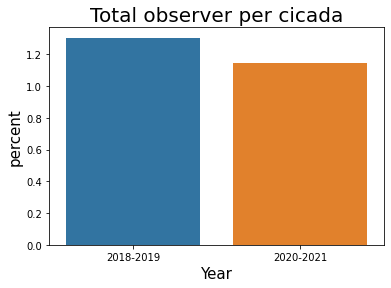

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=cicada_percent, x='Year', y='percent')
plt.xlabel("Year", size=15)
plt.ylabel("percent", size=15)
plt.title("Total observer per cicada", size=20)
plt.show()


In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Serif',
 'cmtt10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'cmr10',
 'STIXSizeFourSym',
 'cmss10',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Serif Display',
 'cmsy10',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmex10',
 'cmmi10',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Serif',
 'Humor Sans',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Mo

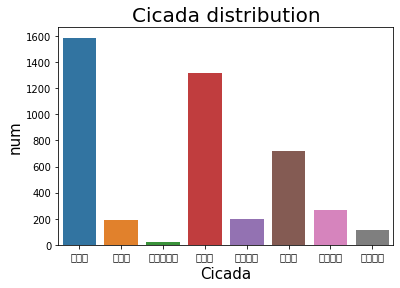

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=cicada_count_2018, x='cicada', y='num')
plt.xlabel("Cicada", size=15)
plt.ylabel("num", size=15)
plt.title("Cicada distribution", size=20)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=cicada_percent, x='Year', y='percent')
plt.xlabel("Year", size=15)
plt.ylabel("percent", size=15)
plt.title("Total observer per cicada", size=20)
plt.show()

In [ ]:
df_2018.to_csv('df_2018.csv')

In [ ]:
df_2020.to_csv('df_2020.csv')

In [ ]:
df_merge['RESCH_1']

0       동영상,사진
1           사진
2           사진
3          동영상
4          동영상
         ...  
6168         네
6169         네
6170         네
6171         네
6172         네
Name: RESCH_1, Length: 6173, dtype: object

In [ ]:
df_참매미=df_merge3[df_merge3['참매미']==1]
df_참매미.info()
#df_merge3.drop(df_drop, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2871 entries, 11 to 6150
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDX_x            2871 non-null   int64  
 1   EXPEDITION_NAME  2871 non-null   object 
 2   CONTENTS         2871 non-null   object 
 3   POS_ADDR         2727 non-null   object 
 4   LATITUDE         2785 non-null   float64
 5   LONGITUDE        2785 non-null   float64
 6   WEATHER          2781 non-null   object 
 7   TEMP             89 non-null     float64
 8   WIND_SPEED       89 non-null     float64
 9   HUMIDITY         89 non-null     float64
 10  WRITER_ID        2835 non-null   object 
 11  WRITE_TIME       2835 non-null   object 
 12  IS_Q             2835 non-null   object 
 13  IDX_y            2871 non-null   float64
 14  POSTING_IDX      2871 non-null   float64
 15  RESCH_1_Q        2871 non-null   object 
 16  RESCH_2_Q        2871 non-null   object 
 17  RESCH_3_Q    

In [ ]:
df_참매미=df_merge3[df_merge3['참매미']==1]
df_참매미


IDX_x EXPEDITION_NAME  \
11    219545      지구사랑탐사대 8기   
16    220194      지구사랑탐사대 8기   
30    221641      지구사랑탐사대 8기   
38    222858      지구사랑탐사대 8기   
45    223210      지구사랑탐사대 8기   
...      ...             ...   
6103  157568      지구사랑탐사대 7기   
6104  157569      지구사랑탐사대 7기   
6110  157913      지구사랑탐사대 7기   
6132  158807      지구사랑탐사대 7기   
6150  160241      지구사랑탐사대 7기   

                                               CONTENTS  \
11    <p><img style="max-width:840px;width:100%;" sr...   
16    <img style="max-width:840px;width:100%;" src="...   
30    <audio controls="" src="/upload/earth/2020/07/...   
38    <img style="max-width:840px;width:100%;" src="...   
45    <img style="max-width:840px;width:100%;" src="...   
...                                                 ...   
6103  <img style="max-width:840px;width:100%;" src="...   
6104  <img style="max-width:840px;width:100%;" src="...   
6110  <video controls="" preload="none" style="backg...   
6132  <audio controls="" src="/upload/earth/2019/09/...   
6150  <audio controls="" src="/upload/earth/2019/10/...   

                              POS_ADDR   LATITUDE   LONGITUDE WEATHER  TEMP  \
11          대한민국 경기도 용인시 기흥구 영덕동 691-3  37.278564  127.070213      흐림   NaN   
16            대한민국 서울특별시 성북구 종암동 54-73  37.595914  127.032799      흐림   NaN   
30                   대한민국 고양시 장항동 호수공원  37.660877  126.763494   매우 흐림   NaN   
38             대한민국 서울특별시 성북구 종암동 50-4  37.596847  127.032307      맑음   NaN   
45             대한민국 서울특별시 성북구 종암동 50-3  37.596804  127.032255      맑음   NaN   
...                                ...        ...         ...     ...   ...   
6103        대한민국 경기도 성남시 분당구 수내동 123-2  37.369037  127.126244      먼지   NaN   
6104        대한민국 경기도 성남시 분당구 수내동 123-2  37.369037  127.126244      먼지   NaN   
6110         대한민국 경기도 수원시 장안구 하광교동 273  37.309062  127.024434      맑음   NaN   
6132   대한민국 경기도 용인시 처인구 모현면 왕산리 171-12  37.336938  127.264194      맑음   NaN   
6150  대한민국 경상남도 창원시 마산합포구 진전면 일암리 산155  35.113962  128.371006      맑음   NaN   

      WIND_SPEED  HUMIDITY  ...  털매미 소요산매미  말매미  유지매미  애매미 쓰름매미 늦털매미   기타  \
11           NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
16           NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
30           NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
38           NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
45           NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
...          ...       ...  ...  ...   ...  ...   ...  ...  ...  ...  ...   
6103         NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
6104         NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
6110         NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
6132         NaN       NaN  ...  1.0   0.0  1.0   0.0  0.0  0.0  0.0  0.0   
6150         NaN       NaN  ...  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   

        year month  
11    2020.0   7.0  
16    2020.0   7.0  
30    2020.0   7.0  
38    2020.0   7.0  
45    2020.0   7.0  
...      ...   ...  
6103  2019.0   9.0  
6104  2019.0   9.0  
6110  2019.0   9.0  
6132  2019.0   9.0  
6150  2019.0  10.0  

[2871 rows x 47 columns]

In [ ]:
df_참매미=df_merge3[df_merge3['참매미']==1]
df_말매미=df_merge3[df_merge3['말매미']==1]
df_애매미=df_merge3[df_merge3['애매미']==1]
df_털매미=df_merge3[df_merge3['털매미']==1]
df_쓰름매미=df_merge3[df_merge3['쓰름매미']==1]
df_유지매미=df_merge3[df_merge3['유지매미']==1]

In [ ]:
df_털매미[df_털매미['cicada_type']=='늦털매미']

IDX_x EXPEDITION_NAME  \
531   229702      지구사랑탐사대 8기   
968   233106      지구사랑탐사대 8기   
1205  240864      지구사랑탐사대 8기   
1206  241067      지구사랑탐사대 8기   
1210  241312      지구사랑탐사대 8기   
...      ...             ...   
6168  162480      지구사랑탐사대 7기   
6169  162524      지구사랑탐사대 7기   
6170  162530      지구사랑탐사대 7기   
6171  162543      지구사랑탐사대 7기   
6172  162649      지구사랑탐사대 7기   

                                               CONTENTS  \
531   <audio controls="" src="/upload/earth/2020/08/...   
968   <p><img style="max-width:840px;width:100%;" sr...   
1205  <img style="max-width:840px;width:100%;" src="...   
1206  <audio controls="" src="/upload/earth/2020/09/...   
1210  <video controls="" preload="none" style="backg...   
...                                                 ...   
6168  <img style="max-width:840px;width:100%;" src="...   
6169  <audio controls="" src="/upload/earth/2019/10/...   
6170  <img style="max-width:840px;width:100%;" src="...   
6171  <img style="max-width:840px;width:100%;" src="...   
6172  <audio controls="" src="/upload/earth/2019/10/...   

                           POS_ADDR   LATITUDE   LONGITUDE WEATHER  TEMP  \
531        대한민국 경기도 안양시 동안구 평안동 부림로  37.388963  126.968112      안개   NaN   
968      대한민국 경기도 수원시 팔달구 화서동 436-3  37.282166  126.989197   조금 흐림   NaN   
1205      대한민국 경기도 수원시 영통구 하동 815-8  37.284696  127.063693      맑음   NaN   
1206                            NaN  37.284272  127.065512   구름 조금   NaN   
1210     대한민국 전라남도 장성군 북하면 약수리 산122  35.453469  126.880932      맑음   NaN   
...                             ...        ...         ...     ...   ...   
6168  대한민국 인천광역시 옹진군 북도면 신도리 산331-1  37.515147  126.436882      흐림   NaN   
6169     대한민국 인천광역시 옹진군 북도면 신도리 269  37.528777  126.455501      맑음   NaN   
6170   대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172  126.455515   구름 조금   NaN   
6171   대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172  126.455515   구름 조금   NaN   
6172       대한민국 경기도 광주시 도척면 도웅리 산23  37.339072  127.293360      맑음   NaN   

      WIND_SPEED  HUMIDITY  ...  털매미 소요산매미  말매미  유지매미  애매미 쓰름매미 늦털매미   기타  \
531          NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
968          NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
1205         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
1206         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
1210         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
...          ...       ...  ...  ...   ...  ...   ...  ...  ...  ...  ...   
6168         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
6169         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
6170         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
6171         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   
6172         NaN       NaN  ...  1.0   0.0  0.0   0.0  0.0  0.0  1.0  0.0   

        year month  
531   2020.0   8.0  
968   2020.0   8.0  
1205  2020.0   9.0  
1206  2020.0   9.0  
1210  2020.0   9.0  
...      ...   ...  
6168  2019.0  10.0  
6169  2019.0  10.0  
6170  2019.0  10.0  
6171  2019.0  10.0  
6172  2019.0  10.0  

[101 rows x 47 columns]

### 새로운 df 생성

In [ ]:
df_location=df_merge3[['POS_ADDR','LATITUDE','LONGITUDE','cicada_type','place']].dropna()
df_location

POS_ADDR   LATITUDE   LONGITUDE      cicada_type  \
0         대한민국 강원도 영월군 영월읍 영흥리 1087  37.195652  128.454258  기타 (아래에 써 주세요.)   
1        대한민국 경기도 포천시 신북면 삼정리 148-1  37.974330  127.150596  기타 (아래에 써 주세요.)   
2       대한민국 경기도 가평군 가평읍 이화리 산256-2  37.798361  127.524768              털매미   
3          대한민국 서울특별시 성북구 종암동 57-27  37.597499  127.030496              털매미   
4     대한민국 서울특별시 성내동 강동구청역1번출구.영파여고  37.532039  127.120848              말매미   
...                             ...        ...         ...              ...   
6168  대한민국 인천광역시 옹진군 북도면 신도리 산331-1  37.515147  126.436882             늦털매미   
6169     대한민국 인천광역시 옹진군 북도면 신도리 269  37.528777  126.455501             늦털매미   
6170   대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172  126.455515             늦털매미   
6171   대한민국 인천광역시 옹진군 북도면 신도리 270-2  37.529172  126.455515             늦털매미   
6172       대한민국 경기도 광주시 도척면 도웅리 산23  37.339072  127.293360             늦털매미   

         place  
0        park2  
1        park2  
2        park2  
3        park2  
4        park2  
...        ...  
6168   wetland  
6169    forest  
6170  farmland  
6171  farmland  
6172    forest  

[5590 rows x 5 columns]

## 지도 생성

In [ ]:
import json

#한국 지도 생성
m=folium.Map([37,127], zoom_start=7)
m

In [ ]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5590 entries, 0 to 6172
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS_ADDR     5590 non-null   object 
 1   LATITUDE     5590 non-null   float64
 2   LONGITUDE    5590 non-null   float64
 3   cicada_type  5590 non-null   object 
 4   place        5590 non-null   object 
dtypes: float64(2), object(3)
memory usage: 262.0+ KB


### marker map

In [ ]:
# Create a map
m2 = folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=4)

#지도에 마커 포인트 추가
for idx, row in df_location.iterrows():
  Marker([row['LATITUDE'], row['LONGITUDE']],
         popup=row['cicada_type'],
         icon=folium.Icon(color='green')).add_to(m2)

m2

### Marker Cluster

In [ ]:
#map 생성
import math
m3=folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=7)

#add points to the map

mc = MarkerCluster()
for idx, row in df_location.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']],
                            popup=row['cicada_type']))
m3.add_child(mc)

# Display the map
m3

In [ ]:
#map 생성
#참매미


import math
m10=folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=7)

#add points to the map

mc = MarkerCluster()
for idx, row in df_참매미.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']],
                            popup=row['cicada_type']))
m10.add_child(mc)

# Display the map
m10

In [ ]:
#말매미
import math
m11=folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=7)

#add points to the map

mc = MarkerCluster()
for idx, row in df_말매미.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']],
                            popup=row['cicada_type']))
m11.add_child(mc)

# Display the map
m11

In [ ]:
import math
m12=folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=7)

#add points to the map

mc = MarkerCluster()
for idx, row in df_애매미.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']],
                            popup=row['cicada_type']))
m12.add_child(mc)

# Display the map
m12

In [ ]:
import math
m13=folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=7)

#add points to the map

mc = MarkerCluster()
for idx, row in df_털매미.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']],
                            popup=row['cicada_type']))
m13.add_child(mc)

# Display the map
m13

In [ ]:
import math
m14=folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=7)

#add points to the map

mc = MarkerCluster()
for idx, row in df_쓰름매미.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']],
                            popup=row['cicada_type']))
m14.add_child(mc)

# Display the map
m14

In [ ]:
import math
m15=folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=7)

#add points to the map

mc = MarkerCluster()
for idx, row in df_유지매미.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']],
                            popup=row['cicada_type']))
m15.add_child(mc)

# Display the map
m15

### bubble maps

In [ ]:
df_location['cicada_type'].unique()

array(['기타 (아래에 써 주세요.)', '털매미', '말매미', '쓰름매미', '참매미', '애매미', '소요산매미',
       '참매미,말매미', '참매미,애매미,쓰름매미', '유지매미', '쓰름매미,털매미', '말매미,쓰름매미,털매미',
       '참매미,털매미', '참매미,말매미,애매미', '참매미,애매미', '말매미,쓰름매미',
       '참매미,쓰름매미,기타 (아래에 써 주세요.)', '애매미,쓰름매미', '참매미,유지매미', '말매미,애매미',
       '늦털매미', '참매미,기타 (아래에 써 주세요.)', '애매미,기타 (아래에 써 주세요.)',
       '참매미,말매미,기타 (아래에 써 주세요.)', '참매미,말매미,쓰름매미', '참매미,말매미,애매미,쓰름매미',
       '참매미,말매미,유지매미', '참매미,털매미,기타 (아래에 써 주세요.)',
       '참매미,말매미,털매미,기타 (아래에 써 주세요.)', '소요산매미,기타 (아래에 써 주세요.)', '참매미,쓰름매미',
       '쓰름매미,유지매미', '참매미,애매미,쓰름매미,유지매미', '말매미,유지매미,기타 (아래에 써 주세요.)',
       '참매미,말매미,애매미,유지매미', '참매미,애매미,유지매미', '참매미,말매미,소요산매미', '말매미,유지매미',
       '말매미,애매미,털매미,늦털매미', '쓰름매미,기타 (아래에 써 주세요.)', '말매미,애매미,쓰름매미',
       '말매미,기타 (아래에 써 주세요.)', '참매미,애매미,털매미', '애매미,털매미', '유지매미,털매미',
       '말매미,늦털매미', '털매미,늦털매미', '애매미,늦털매미', '말매미,털매미', '참매미,소요산매미',
       '참매미,쓰름매미,유지매미', '말매미,애매미,털매미', '쓰름매미,소요산매미', '참매미,말매미,털매미',
       '참매미,말매미,애매미,기타 (아래에 써 주세요.)', '유지매미,기타 (아래에 써 주세요.)', '애매미

In [ ]:
# Create a base map 참매미 일 때
m4 = folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=6)

def color_producer(val):
    if val == '참매미':
        return 'forestgreen'
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(df_location)):
    Circle(
        location=[df_location.iloc[i]['LATITUDE'], df_location.iloc[i]['LONGITUDE']],
        radius=20,
        color=color_producer(df_location.iloc[i]['cicada_type'])).add_to(m4)

# Display the map
m4


### heatmap

In [ ]:
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from folium.plugins import HeatMap

In [ ]:
# Create a base map
m_5 = folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=8)

# Add a heatmap to the base map
HeatMap(data=df_location[['LATITUDE', 'LONGITUDE']], radius=15,
        ).add_to(m_5)

# Display the map
m_5

### choropleth maps

In [ ]:
import plotly.express as px
import pandas as pd
import os
import json

In [ ]:
#json 파일 프린트

from glob import glob
for filename in glob('*.json'):
  print(filename)

In [ ]:
#경로 설정

# 데이터 로드
geometry_gj =


In [ ]:
df_location.isna().sum()

POS_ADDR       0
LATITUDE       0
LONGITUDE      0
cicada_type    0
place          0
dtype: int64

In [ ]:
gdf_cicada

POS_ADDR      cicada_type     place  \
0         대한민국 강원도 영월군 영월읍 영흥리 1087  기타 (아래에 써 주세요.)     park2   
1        대한민국 경기도 포천시 신북면 삼정리 148-1  기타 (아래에 써 주세요.)     park2   
2       대한민국 경기도 가평군 가평읍 이화리 산256-2              털매미     park2   
3          대한민국 서울특별시 성북구 종암동 57-27              털매미     park2   
4     대한민국 서울특별시 성내동 강동구청역1번출구.영파여고              말매미     park2   
...                             ...              ...       ...   
6168  대한민국 인천광역시 옹진군 북도면 신도리 산331-1             늦털매미   wetland   
6169     대한민국 인천광역시 옹진군 북도면 신도리 269             늦털매미    forest   
6170   대한민국 인천광역시 옹진군 북도면 신도리 270-2             늦털매미  farmland   
6171   대한민국 인천광역시 옹진군 북도면 신도리 270-2             늦털매미  farmland   
6172       대한민국 경기도 광주시 도척면 도웅리 산23             늦털매미    forest   

                        geometry  
0     POINT (37.19565 128.45426)  
1     POINT (37.97433 127.15060)  
2     POINT (37.79836 127.52477)  
3     POINT (37.59750 127.03050)  
4     POINT (37.53204 127.12085)  
...                          ...  
6168  POINT (37.51515 126.43688)  
6169  POINT (37.52878 126.45550)  
6170  POINT (37.52917 126.45552)  
6171  POINT (37.52917 126.45552)  
6172  POINT (37.33907 127.29336)  

[5590 rows x 4 columns]

In [ ]:
# Choropleth 시각화


#지도
m5=folium.Map(location=[37,127], tiles='cartodbpositron', zoom_start=6)

#add a choropleth map

folium.Choropleth(data=gdf_cicada,
                  geo_data=geometry_gj,
                  columnns=['geometry', 'cicada_type'],
           fill_color='PuRd',
           fill_opactity=0.8
           #legend_name='Distribution of cicada'
           ).add_to(m5)

m5

TypeError: ignored

In [ ]:
geometry_gj

'https://github.com/southkorea/southkorea-maps/blob/master/kostat/2013/kml/skorea_provinces_simple.json'

In [ ]:
# GeoDataFrame with geographical boundaries of Boston police districts
districts_full = gpd.read_file('../input/geospatial-learn-course-data/Police_Districts/Police_Districts/Police_Districts.shp')
districts = districts_full[["DISTRICT", "geometry"]].set_index("DISTRICT")
districts.head()

ERROR:fiona._env:../input/geospatial-learn-course-data/Police_Districts/Police_Districts/Police_Districts.shp: No such file or directory


DriverError: ignored

### Geopandas

In [ ]:
#공간데이터프레임으로 변환

geom_df=gpd.points_from_xy(df_location.LATITUDE, df_location.LONGITUDE)

In [ ]:
df_location.columns

Index(['POS_ADDR', 'LATITUDE', 'LONGITUDE', 'cicada_type', 'place'], dtype='object')

In [ ]:
#좌표계 정의/변환용 라이브러리

import pyproj
from fiona.crs import from_epsg
columns = ['POS_ADDR','LATITUDE','LONGITUDE','cicada_type', 'place']
gdf_cicada = gpd.GeoDataFrame(df_location[columns], geometry=geom_df, crs=from_epsg(4326))
#df_cctv_gdf.info()
gdf_cicada.head()

POS_ADDR   LATITUDE   LONGITUDE      cicada_type  \
0      대한민국 강원도 영월군 영월읍 영흥리 1087  37.195652  128.454258  기타 (아래에 써 주세요.)   
1     대한민국 경기도 포천시 신북면 삼정리 148-1  37.974330  127.150596  기타 (아래에 써 주세요.)   
2    대한민국 경기도 가평군 가평읍 이화리 산256-2  37.798361  127.524768              털매미   
3       대한민국 서울특별시 성북구 종암동 57-27  37.597499  127.030496              털매미   
4  대한민국 서울특별시 성내동 강동구청역1번출구.영파여고  37.532039  127.120848              말매미   

   place                    geometry  
0  park2  POINT (37.19565 128.45426)  
1  park2  POINT (37.97433 127.15060)  
2  park2  POINT (37.79836 127.52477)  
3  park2  POINT (37.59750 127.03050)  
4  park2  POINT (37.53204 127.12085)

In [ ]:
gdf_cicada.crs

<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

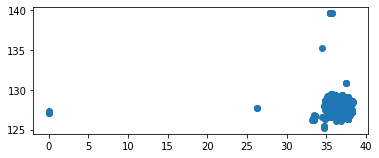

In [ ]:
gdf_cicada.plot(aspect=1)

In [ ]:
geom_loc=gpd.points_from_xy(gdf_cicada.LATITUDE, gdf_cicada.LONGITUDE)
geom_loc[0:3]

<GeometryArray>
Length: 3, dtype: geometry

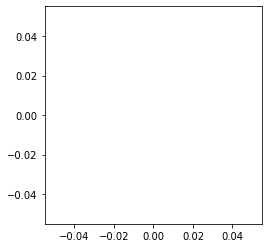

In [ ]:
gdf_cicada3 = gdf_cicada.to_crs(epsg=3857)  #좌표계를 epsg 3857로 변환
gdf_cicada3.plot(color='gray')

In [ ]:
gdf_cicada.plot()

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f67a6b5ccb0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
df_merge3['POS_ADDR'].isna().sum()

0

In [ ]:
df_place_seoul=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('서울'))
df_place_incheon=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('인천'))
df_place_daejun=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('대전'))
df_place_daegu=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('대구'))
df_place_ulsan=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('울산'))
df_place_busan=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('부산'))
df_place_gwangju=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('광주'))

df_place_gyeonggi =pd.DataFrame(df_merge3['POS_ADDR'].str.contains('경기'))
df_place_gangwon=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('강원'))
df_place_chn=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('충청북'))
df_place_chs=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('충청남'))
df_place_jln=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('전라북'))
df_place_jls=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('전라남'))
df_place_gsn=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('경상북'))
df_place_gss=pd.DataFrame(df_merge3['POS_ADDR'].str.contains('경상남'))

In [ ]:
df_place_seoul.fillna(0, inplace=True)
df_place_incheon.fillna(0, inplace=True)
df_place_daejun.fillna(0, inplace=True)
df_place_daegu.fillna(0, inplace=True)
df_place_ulsan.fillna(0, inplace=True)
df_place_busan.fillna(0, inplace=True)
df_place_gwangju.fillna(0, inplace=True)
df_place_gyeonggi.fillna(0, inplace=True)
df_place_gangwon.fillna(0, inplace=True)
df_place_chn.fillna(0, inplace=True)
df_place_chs.fillna(0, inplace=True)
df_place_jln.fillna(0, inplace=True)
df_place_jls.fillna(0, inplace=True)
df_place_gsn.fillna(0, inplace=True)
df_place_gss.fillna(0, inplace=True)

In [ ]:
df_place_seoul.isna().sum()

POS_ADDR    0
dtype: int64

In [ ]:
df_place_gss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   POS_ADDR  6173 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [ ]:
df_place_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   POS_ADDR  6173 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [ ]:
df_place_seoul.value_counts()

POS_ADDR
False       4151
True        2022
dtype: int64

In [ ]:
df_place_seoul.head()

POS_ADDR
0    False
1    False
2    False
3     True
4     True